#### Job Satisfaction

In this notebook, you will be exploring job satisfaction according to the survey results.  Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [1]:
import pandas as pd
import numpy as np
import JobSatisfaction as t
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Space for your code
print ("Job Satisfaction: {:.4f}".format(df["JobSatisfaction"].isnull().sum()/df.shape[0]))


Job Satisfaction: 0.2015


In [3]:
#More space for code
df["EmploymentStatus"].value_counts()

Employed full-time                                      13655
Independent contractor, freelancer, or self-employed     1866
Employed part-time                                       1168
Not employed, and not looking for work                   1066
Not employed, but looking for work                        906
I prefer not to say                                       381
Retired                                                    60
Name: EmploymentStatus, dtype: int64

In [35]:
#Additional space for your additional code

df["JobSatisfaction"].value_counts(dropna=False)


NaN     3849
8.0     3483
7.0     3087
9.0     2159
6.0     1749
10.0    1529
5.0     1370
4.0      668
3.0      598
2.0      322
0.0      154
1.0      134
Name: JobSatisfaction, dtype: int64

In [5]:
#Feel free to create new cells as you need them
df_jobsat = df[df["JobSatisfaction"].notnull()]

In [6]:
df_jobsat.groupby(by = "EmploymentStatus")["JobSatisfaction"].mean().sort_values()

EmploymentStatus
Employed part-time                                      6.846154
Employed full-time                                      6.980608
Independent contractor, freelancer, or self-employed    7.231985
Name: JobSatisfaction, dtype: float64

In [7]:
df_comp_size = df[df["CompanySize"].notnull()]
cleanup_nums = {"company_size_ord":     {"Fewer than 10 employees": 0, "10 to 19 employees": 1, "20 to 99 employees": 2, "100 to 499 employees": 3, "500 to 999 employees": 4, "1,000 to 4,999 employees": 5, "5,000 to 9,999 employees": 6, "10,000 or more employees": 7}}
df_comp_size["company_size_ord"] = df_comp_size["CompanySize"]
df_comp_size = df_comp_size.replace(cleanup_nums)
df_comp_size.head()


In [31]:
df_comp_size["JobSatisfaction"].value_counts(dropna=False)
df_comp_size = df_comp_size[df_comp_size["JobSatisfaction"].notnull()]
df_comp_size = df_comp_size[pd.to_numeric(df_comp_size['company_size_ord'], errors='coerce').notnull()]
df_comp_size["company_size_ord"] = df_comp_size["company_size_ord"].astype(float)


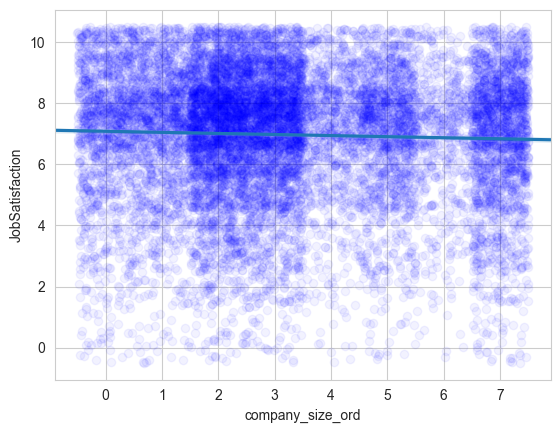

In [37]:
sns.regplot(data = df_comp_size, x = 'company_size_ord', y = 'JobSatisfaction', truncate=False, x_jitter=0.5, y_jitter=0.5, scatter_kws = {"color": "blue", "alpha": 0.05});



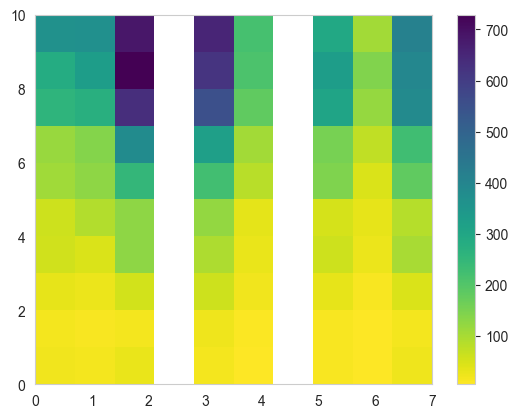

In [38]:
# Use cmin to set a minimum bound of counts
# Use cmap to reverse the color map.
plt.hist2d(data = df_comp_size, x = 'company_size_ord', y = 'JobSatisfaction', cmin=0.5, cmap='viridis_r')
plt.colorbar()


In [40]:
'''
We have ordinal variables and therefore Spearman's test makes sense.
'''

from scipy.stats import spearmanr
# calculate spearman's correlation
coef, p = spearmanr(df_comp_size["company_size_ord"], df_comp_size["JobSatisfaction"])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.5f' % p)
else:
 print('Samples are correlated (reject H0) p=%.5f' % p)


Spearmans correlation coefficient: -0.039
Samples are correlated (reject H0) p=0.00001


In [41]:
'''
We however perform Pearson's Chi-Squared for categorical variables for comparison.
'''
from scipy.stats import chi2, chi2_contingency

table = pd.crosstab(index=df_comp_size['company_size_ord'], columns=df_comp_size['JobSatisfaction'])

stat, p, dof, expected = chi2_contingency(table)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')



Dependent (reject H0)


In [36]:
df_comp_size["CompanySize"].value_counts(dropna=False)
df_comp_size.groupby(by="CompanySize")["JobSatisfaction"].mean().sort_values()


CompanySize
10,000 or more employees    6.793617
5,000 to 9,999 employees    6.832155
1,000 to 4,999 employees    6.908506
20 to 99 employees          6.997039
Fewer than 10 employees     7.025719
100 to 499 employees        7.029324
500 to 999 employees        7.029967
10 to 19 employees          7.035739
Name: JobSatisfaction, dtype: float64

In [ ]:
df["ProgramHobby"].value_counts()


In [ ]:
df.groupby(by = "ProgramHobby")["JobSatisfaction"].mean().sort_values()


In [ ]:
df["HomeRemote"].value_counts(dropna=False)

In [ ]:
df.groupby(by = "HomeRemote")["JobSatisfaction"].mean().sort_values()


In [ ]:
df["FormalEducation"].value_counts(dropna=False)


In [ ]:
df.groupby("FormalEducation")["JobSatisfaction"].mean().sort_values()


#### Question 1

**1.** Use the space above to assist in matching each variable (**a**, **b**, **c**, **d**, **e**, **f**, **g**, or **h** ) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [ ]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?': d,
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f}
             
t.jobsat_check1(job_sol_1)

#### Question 2

**2.** Use the space above to assist in matching each variable (**a**, **b**, **c** ) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.

In [ ]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?': a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a,
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}
             
t.jobsat_check2(job_sol_2)